In [8]:
import os
from tqdm import tqdm
import shutil
import random
from helper_functions import *

## 1. Synthetic image generation

In [6]:
# Run generate_images.sh from the '1. Synthetic image generation' folder

In [2]:
# Folder containing output from synthetic image generation step
src_folder = '1. Synthetic image generation/ecg_signals'

# Move images
dest_folder = '2. Dataset augmentations/datasets/data_full/images/train'
move_files_by_extension(src_folder, dest_folder, '.png')

# Move JSON files
dest_folder = '2. Dataset augmentations/datasets/data_full/json'
move_files_by_extension(src_folder, dest_folder, '.json')

Moving '.png' files: 100%|██████████| 10/10 [00:00<00:00, 1730.04it/s]


Moved 10 '.png' files from 1. Synthetic image generation/ecg_signals to 2. Dataset augmentations/datasets/data_full/images/train


Moving '.json' files: 100%|██████████| 10/10 [00:00<00:00, 1473.60it/s]

Moved 10 '.json' files from 1. Synthetic image generation/ecg_signals to 2. Dataset augmentations/datasets/data_full/json


In [3]:
# Annotate images
src_folder = '2. Dataset augmentations/datasets/data_full/json'
dest_folder = '2. Dataset augmentations/datasets/data_full/labels/train'

annotate_images(src_folder, dest_folder)

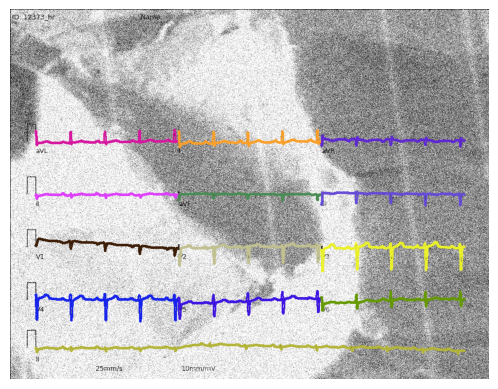

In [4]:
# Visualize annotation
image_path = '2. Dataset augmentations/datasets/data_full/images/train/12373_hr-0.png'
label_path = '2. Dataset augmentations/datasets/data_full/labels/train/12373_hr-0.txt'

plot_annotations(image_path, 
                 label_path, 
                 save_file=False, 
                 save_path=None)

## 2. Dataset augmentations

In [1]:
# Run make_leadname.py, make_patches.py and make_pulse.py

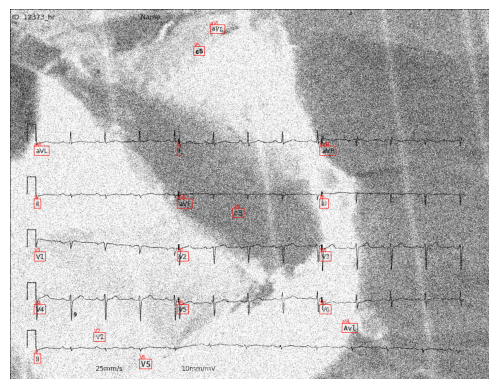

In [5]:
# Visualize lead names
class_names = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
image_path = "2. Dataset augmentations/datasets/data_lead/images/train/12373_hr-0.png"
label_path = "2. Dataset augmentations/datasets/data_lead/labels/train/12373_hr-0.txt"

draw_yolo_boxes(image_path, label_path, class_names)

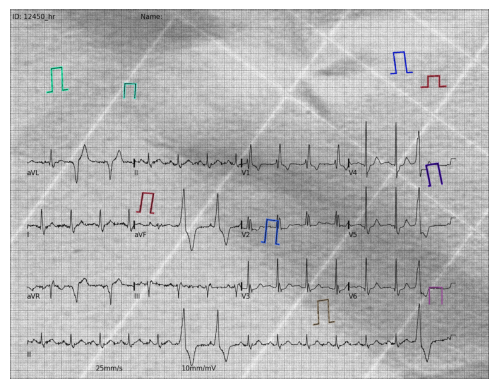

In [6]:
# Visualize reference pulses
image_path = "2. Dataset augmentations/datasets/data_pulse/images/train/12450_hr-0_0.png"
label_path = "2. Dataset augmentations/datasets/data_pulse/labels/train/12450_hr-0_0.txt"

plot_annotations(image_path, 
                 label_path, 
                 save_file=False, 
                 save_path=None)

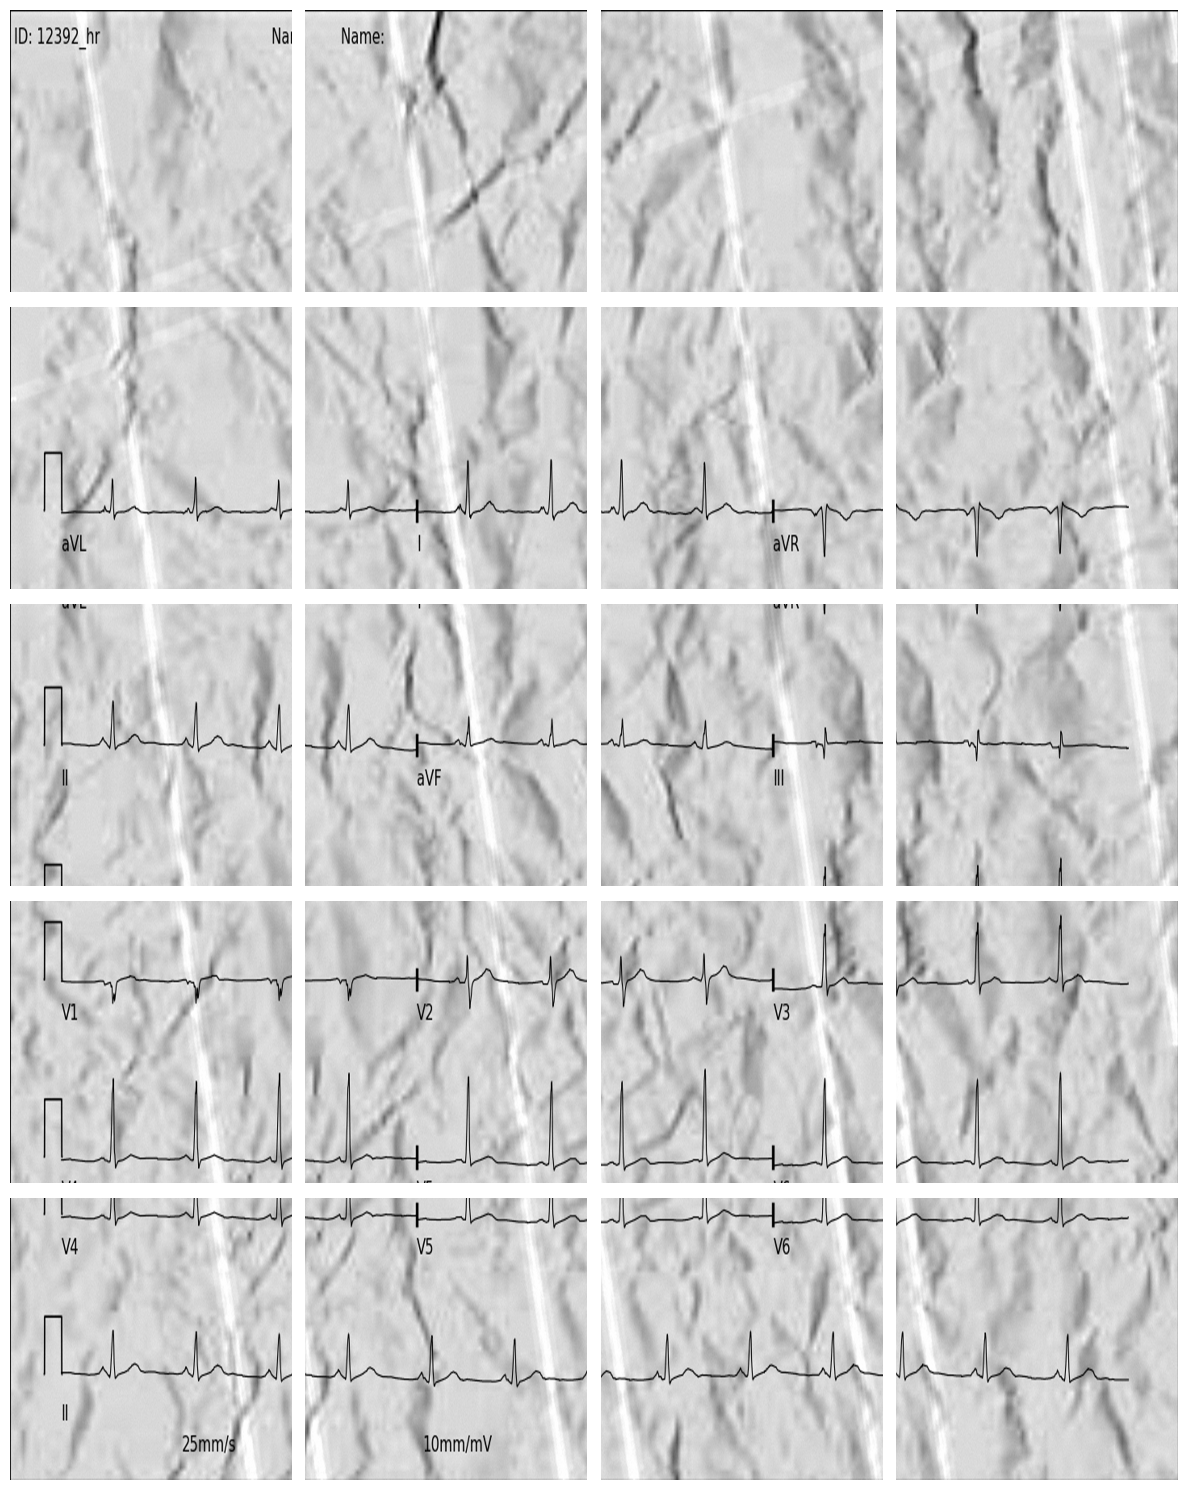

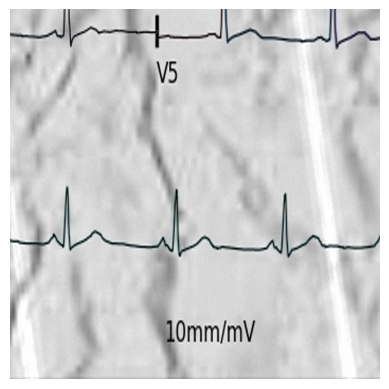

In [7]:
# Visualize patches
visualize_image_grid("2. Dataset augmentations/datasets/data_patch/images/train", prefix="12392_hr-0")

image_path = "2. Dataset augmentations/datasets/data_patch/images/train/12392_hr-0_4_1.png"
label_path = "2. Dataset augmentations/datasets/data_patch/labels/train/12392_hr-0_4_1.txt"

plot_annotations(image_path, 
                 label_path, 
                 save_file=False, 
                 save_path=None)

In [9]:
# Make data splits

split_files(
    folder_im="2. Dataset augmentations/datasets/data_lead/images",
    folder_la="2. Dataset augmentations/datasets/data_lead/labels",
    val_ratio=0.2,
    test_ratio=0.1,
)

split_files(
    folder_im="2. Dataset augmentations/datasets/data_patch/images",
    folder_la="2. Dataset augmentations/datasets/data_patch/labels",
    val_ratio=0.2,
    test_ratio=0.1,
)

split_files(
    folder_im="2. Dataset augmentations/datasets/data_pulse/images",
    folder_la="2. Dataset augmentations/datasets/data_pulse/labels",
    val_ratio=0.2,
    test_ratio=0.1,
)

split_files(
    folder_im="2. Dataset augmentations/datasets/data_full/images",
    folder_la="2. Dataset augmentations/datasets/data_full/labels",
    val_ratio=0.2,
    test_ratio=0.1,
)

# Optional: Move files back
'''move_split_files(
    folder_im="2. Dataset augmentations/datasets/data_lead/images",
    folder_la="2. Dataset augmentations/datasets/data_lead/labels"
)

move_split_files(
    folder_im="2. Dataset augmentations/datasets/data_patch/images",
    folder_la="2. Dataset augmentations/datasets/data_patch/labels"
)

move_split_files(
    folder_im="2. Dataset augmentations/datasets/data_pulse/images",
    folder_la="2. Dataset augmentations/datasets/data_pulse/labels"
)

move_split_files(
    folder_im="2. Dataset augmentations/datasets/data_full/images",
    folder_la="2. Dataset augmentations/datasets/data_full/labels"
)'''

Moving to test: 100%|██████████| 1/1 [00:00<00:00, 876.74it/s]


'move_split_files(\n    folder_im="2. Dataset augmentations/datasets/data_lead/images",\n    folder_la="2. Dataset augmentations/datasets/data_lead/labels"\n)\n\nmove_split_files(\n    folder_im="2. Dataset augmentations/datasets/data_patch/images",\n    folder_la="2. Dataset augmentations/datasets/data_patch/labels"\n)\n\nmove_split_files(\n    folder_im="2. Dataset augmentations/datasets/data_pulse/images",\n    folder_la="2. Dataset augmentations/datasets/data_pulse/labels"\n)\n\nmove_split_files(\n    folder_im="2. Dataset augmentations/datasets/data_full/images",\n    folder_la="2. Dataset augmentations/datasets/data_full/labels"\n)'

## 3. Model training

In [10]:
# Run yolo_train_full.py, yolo_train_patch.py, yolo_train_pulse.py and yolo_train_lead.py

## 4. Digitization pipeline

In [11]:
# Run digitize_image.ipynb